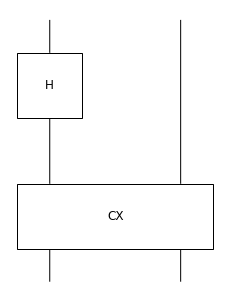

In [1]:
from discopy.circuit import *

circuit = H @ Id(1) >> CX
circuit.draw()

In [2]:
tk_circ = circuit.to_tk()
list(tk_circ)

[H q[0];, CX q[0], q[1];]

In [6]:
from pytket.backends.ibm import IBMQBackend

In [8]:
circuit.get_counts(IBMQBackend('ibmq_5_yorktown'))

Job Status: job has successfully run


Matrix(dom=Dim(1), cod=Dim(2, 2), array=[0.5078125, 0.026367188, 0.009765625, 0.4560547])

In [10]:
(Ket(0, 0) >> circuit).measure()

DeviceArray([[0.49999997, 0.        ],
             [0.        , 0.49999997]], dtype=float32)